# Аналитика: визуализация данных
Основа анализа любых данных - это их визуализация. В Python для этой цели есть две наиболее популярные библиотеки: matplotlib и seaborn. Они позволяют строить и сохранять различные виды графиков по вашим данным.

Мы рассмотрим работу с ними на конкретном датасете: история задержек вылетов пассажирских рейсов за 2008 год. Этот дадасет собран по данным Министерства транспорта США. Он включает в себя информацию о датах вылета и прилета рейсов, задержках, переносах, отменах и их причинах.

## Matplotlib (немного простых графиков)

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# графики внутри jupyter
%matplotlib inline

In [24]:
import seaborn as sbn

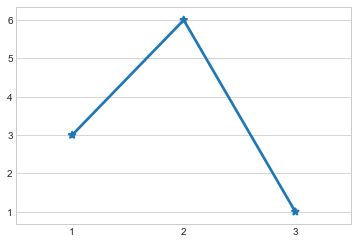

In [39]:
sbn.pointplot([1, 2, 3], [3, 6, 1], markers='*')

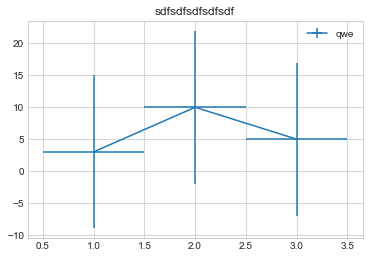

In [46]:
plt.errorbar([1, 2, 3], [3, 10, 5], xerr=0.5, yerr=12)
plt.legend(['qwe', 'wer'])
plt.title('sdfsdfsdfsdfsdf')
plt.show()

График состоит из объектов **figure**, **axes** и других. Внутри одной фигуры (рисунка) может быть несколько осей (графиков), подписей, линий и прочего. Нарисуем что-нибудь простое.

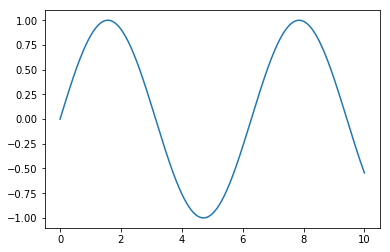

In [2]:
def draw():
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(0, 10, 1000)
    ax.plot(x, np.sin(x))  # можно использовать plt.plot()
    
draw()

Matplotlib поддерживает несколько различных стилей отрисовки графиков, про которые можно почитать в [документации](https://matplotlib.org/users/customizing.html)

In [22]:
plt.style.use('seaborn-whitegrid')

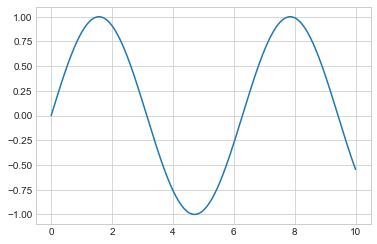

In [23]:
draw()

In [ ]:
plt.style.available  # все доступные стили

### Немного "линейных" графиков

Text(0.5,1,'Compare sin and cos')

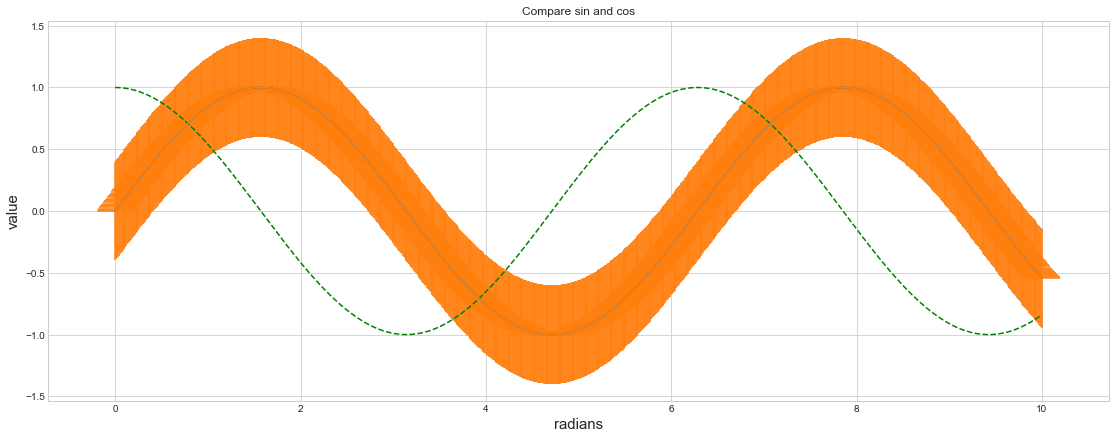

In [44]:
fig = plt.figure(figsize=(19,7))
ax = plt.axes()
x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x), label='sin(x)')
ax.plot(x, np.cos(x), label='cos(x)', color='g', linestyle='--')

ax.errorbar([, np.sin(x), xerr=0.2, yerr=0.4)

ax.set_xlabel('radians', size=15)
ax.set_ylabel('value', size=15)
ax.set_title('Compare sin and cos')


### Необязательная задачка
Поищите в документации про параметр-маркер у plt.plot(). Он позволяет рисовать точки, треугольники и много еще чего, соединять их при этом различными линиями и сразу указывать цвет.

### Диаграммы рассеяния (scatter)

In [ ]:
def draw_scatter():
    fig = plt.figure()
    ax = plt.axes()
    x = np.linspace(0, 10, 50)
    ax.scatter(x, np.sin(x))  # вместо ax.plot
    
draw_scatter()

In [ ]:
def draw_beauty_scatter():
    # создаем 100 рандомных координат
    rng = np.random.RandomState(0)
    x = rng.randn(100)
    y = rng.randn(100)
    
    # выбираем "цвета" и размеры наших точек
    colors = rng.rand(100)
    sizes = 1000 * rng.rand(100)
    
    # рисуем красивую картинку
    plt.figure(figsize=(19, 6))
    plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
               cmap='viridis')
    plt.colorbar()  # цветовая панель справа
    
draw_beauty_scatter()

### Что лучше: plot или scatter?
При небольших объемах данных это не играет роли, но при наборах данных, превышающих несколько тысяч точек, **функция plt.plot может оказаться намного эффективнее plt.scatter**. Поскольку plt.scatter умеет визуализировать различные размеры и цвета каждой точки, визуализатору приходится выполнять дополнительную работу по формированию каждой точки в отдельности. В случае же функции plt.plot все точки одинаковые, поэтому работа по определению внешнего вида точек выполняется только один раз для всего набора данных. Для больших наборов данных это различие может приводить к коренным различиям в производительности, поэтому в таком случае следует использовать функцию plt.plot, а не plt.scatter.

### Что еще умеет matplotlib?
Очень-очень-очень много всего:
* погрешности: plt.errorbar
* заливка частей графиков: plt.fill_between
* контурные графики: plt.contour и plt.contourf
* отображение изображений: plt.imshow 
* гистограммы: plt.hist, plt.hist2d и plt.hexbin

А если это все объединять и активно использовать параметры, то можно построить абсолютно любой график (ограничений почти нет). Главное - найти документацию и суметь разобраться в ней (на деле это может оказаться не так просто, как кажется).

### Несколько графиков на одном рисунке
Есть два способа: извращенный (через параметры plt.axes) и нормальный. Первый мы рассматривать не будем, но если вам понадобится что-то неординарное, то он позволит нарисовать почти что угодно.

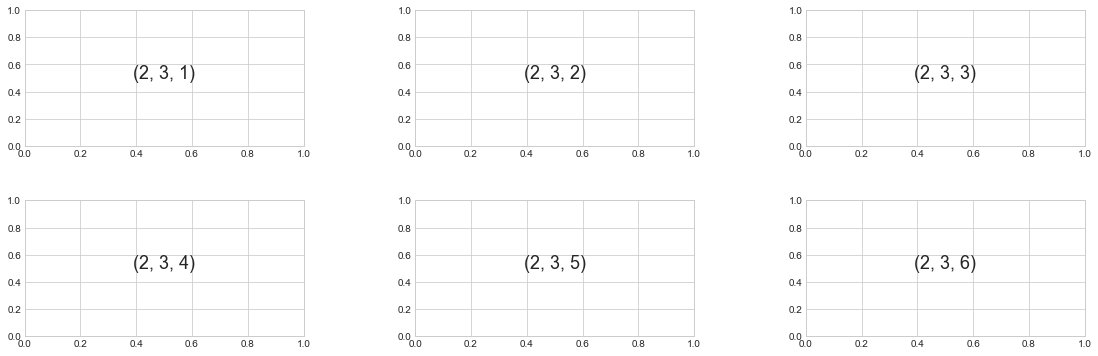

In [47]:
def draw_subplots():
    fig = plt.figure(figsize=(19, 6))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)  # добавляем расстояние между графиками
    for i in range(1, 7):
        ax = fig.add_subplot(2, 3, i)      # (2, 3) - это размер "таблицы", i - позиция
        ax.text(0.5, 0.5, str((2, 3, i)),
                fontsize=18, ha='center')  # добавляем красоты
    
draw_subplots()

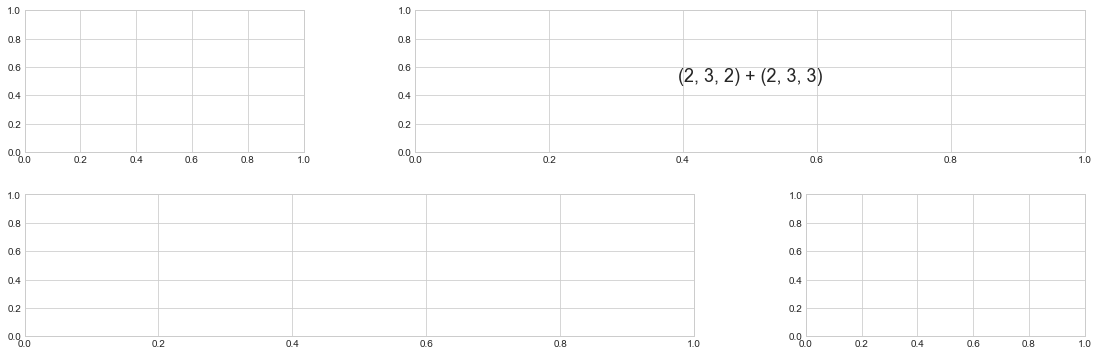

In [48]:
def draw_hard_subplots():
    fig = plt.figure(figsize=(19, 6))
    grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
    plt.subplot(grid[0, 0])
    ax = plt.subplot(grid[0, 1:])
    ax.text(0.5, 0.5, "(2, 3, 2) + (2, 3, 3)",
                fontsize=18, ha='center')
    plt.subplot(grid[1, :2])
    plt.subplot(grid[1, 2]);
    
draw_hard_subplots()

---
## Задача 1
Перепишите функцию draw_beauty_scatter так, чтобы на результирующем рисунке было:
* 3 графика в два ряда (в одном из рядов будет 2 графика сразу);
* графики использует в качестве размера точки: $1000 * x$, $1000 * y$ и $1000 * size$;
* у каждого графика подписаны оси координат;
* заголовок рисунка

---
## Разбор реального кейса
**Или "Переходим к интересной части"**

Для начала скачайте данные [здесь](https://yadi.sk/d/EB2Hct-S3TFgNR). Потом можно прочитать описание или сразу ринуться в бой вслепую (но не рекомендую).

## Описание данных
[Ссылка](https://www.kaggle.com/giovamata/airlinedelaycauses/data) на полное описание данных.<br/>
**DayOfWeek:** день недели (1 - понедельник)<br/>
**DepTime:** фактическое время вылета (локальное) в формате ччмм<br/>
**CRSDepTime:** время вылета по расписанию (локальное) в формате ччмм<br/>
**ArrTime:** фактическое время прилета (локальное) в формате ччмм<br/>
**CRSArrTime:** время прилета по расписанию (локальное) в формате ччмм<br/>
**UniqueCarrier:** уникальный код перевозчика<br/>
**FlightNum:** номер рейса<br/>
**TailNum:** бортовой номер самолета<br/>
**ActualElapsedTime:** время полета (минуты)<br/>
**AirTime:** время в воздухе (минуты)<br/>
**ArrDelay:** время задержки прибытия (минуты)<br/>
**DepDelay:** время задержки отправления (минуты)<br/>
**Distance:** расстояние в милях<br/>
**Cancelled:** отменен ли был рейс?<br/>
**CancellationCode:** причина отмены полета (A = перевозчик, B = погода, C = NAS, D = безопасность)<br/>
**Diverted:** перенесен ли рейс?<br/>

## Разбираемся с тем, что внутри

In [ ]:
df = pd.read_csv("doc/delayed_flights.csv", index_col=0, parse_dates=True)
df.head(2)

In [ ]:
df.info()

Индекс заботливо переведен в datetime64[ns], а значит можно будет совершать операции над временем (вспоминаем прошлый семинар)

Если прочитать описание данных (или внимательно приглядеться), можно увидеть, что времена отлета и прилета записаны очень неудобно. Нужна предобработка данных

In [ ]:
df.dep_time = df.dep_time.astype(int)
df['dttm'] = df.index + df.dep_time.apply(lambda x: timedelta(hours=x//100, minutes=x%100))
df = df.sort_values('dttm')
df.head(2)

У DataFrame есть метод, позволяющий построить некоторые основные статистики для количественных данных (аналогичный метод есть у Series). Качественные данные, например, информацию о перевозчиках, можно смотреть через метод value_counts - по сути он возвращает гистограмму, которую потом можно визуализировать.<br/>
Давайте посмотрим на статистики по количественным признакам и посмотрим на распределение количества поездок от различных перевозчиков (заодно научимся строить barchart).

In [ ]:
df.describe()

In [ ]:
# Построим распределение количества полетов для перевозчиков
carriers = df.unique_carrier.value_counts()
carriers

In [ ]:
carriers.plot.bar()  # все очень просто

## Постановка задачи
Бесцельно смотреть на данные - это не очень интересно, поэтому вот вам задача.

У нас есть данные о перелетах с 1 января 2008 по 1 апреля 2008. Давайте попробуем ответить на вопрос: что влияет на задержки прилета рейсов?

### Шаг 0. Изучение данных о времени задержки рейса
Давайте поймем как у нас в данных хранится время задержки рейса и построим его распределение.

Время задержки хранится отдельной колонкой: dep_delay

In [ ]:
delay = df.arr_delay
descr = delay.describe()
descr

#### Впоросы:
1. Что можно сказать по этим данным?
2. У Series есть метод hist(), который выводит гистограмму значений. Можно ли просто им воспользоваться, чтобы увидеть распределение или нужна предобработка данных?

In [ ]:
low = descr['mean'] - 3 * descr['std']
up = descr['mean'] + 3 * descr['std']
delay[(low < delay) & (delay < up)].hist(bins=100)

### Шаг 1. Изучение зависимостей от одного признака

In [ ]:
def plot_scatter(delay, factor):
    fig = plt.figure(figsize=(17,6))
    x = factor.values
    y = delay.values
    if isinstance(x[0], str):
        # если мощности не хватает, можно закомментить и смотреть другими методами
        x = df.flight_num.values
        ticks = list(set(x))
        x = [ticks.index(name) for name in x]
        plt.xticks(x, ticks)
    plt.plot(x, y, 'o', alpha=0.3)
    plt.title("Зависимость arr_delay от %s" % factor.name, size=25)
    plt.xlabel(factor.name, size=15)
    plt.ylabel("arr_delay", size=15)
    plt.show()

In [ ]:
plot_scatter(delay, df.dep_delay)

#### Впоросы:
1. Какие выводы можно сделать из графика?
2. Всегда ли видя такую картинку можно делать аналогичный вывод?


На самом деле у DataFrame есть метод, позволяющий строить сразу группу таких графиков, но он может работать достаточно долго, особенно на больших наборах данных.

### Задача 2
Попробуйте поизучать зависимости времени задержки прилета от других факторов и сделайте выводы.

### Шаг 2. Изучение зависимостей от группы признаков
Идея изучения подобных зависимостей в том, что возможно в данные можно разделить на более мелкие сегменты, внутри которых есть зависимости, не замеченные на всем наборе.

### Задача 3
Напишите функцию, которая позволит изучать подобные зависимости.